In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# Define file paths
emails_path = r'C:\Users\ekeuz\Desktop\Accessment Prep\Machine Learning\Dataset for the coursework\cmm541data\emails'
labels_path = r'C:\Users\ekeuz\Desktop\Accessment Prep\Machine Learning\Dataset for the coursework\cmm541data\labels\labels'

In [74]:
# Debugging: Check paths existence
print("\nVerifying paths...")
if not os.path.exists(emails_path):
    print(f"Error: Emails directory not found at: {emails_path}")
else:
    print(f"Emails directory found: {emails_path}")

if not os.path.exists(labels_path):
    print(f"Error: Labels file not found at: {labels_path}")
else:
    print(f"Labels file found: {labels_path}")

#CHATGPT


Verifying paths...
Emails directory found: C:\Users\ekeuz\Desktop\Accessment Prep\Machine Learning\Dataset for the coursework\cmm541data\emails
Labels file found: C:\Users\ekeuz\Desktop\Accessment Prep\Machine Learning\Dataset for the coursework\cmm541data\labels\labels


In [75]:
# Check if the labels file is accessible
import os

if os.access(labels_path, os.R_OK):
    print("File is readable.")
else:
    print("Cannot read the file. Check permissions.")
    # Optionally, you could exit the script if the file isn't readable
    # import sys
    # sys.exit("Exiting due to permission error.")

File is readable.


In [76]:
#Load the labels file
labels = []
with open(labels_path, 'r') as file:
    for line in file:
        label, email_path = line.strip().split()  # Split the label and the email path
        labels.append((label, os.path.basename(email_path)))  # Keep only the email filename

# Convert labels to a DataFrame
labels_df = pd.DataFrame(labels, columns=["Label", "Filename"])

# Read email contents and combine with labels
data = []
for _, row in labels_df.iterrows():
    email_file = os.path.join(emails_path, row["Filename"])  # Full path to the email file
    if os.path.exists(email_file):
        with open(email_file, 'r', encoding='latin-1') as email:
            content = email.read()  # Read the email content
            data.append((row["Label"], row["Filename"], content))

# Create a DataFrame for the combined data
emails_df = pd.DataFrame(data, columns=["Label", "Filename", "Content"])

# Save the data to a CSV file
output_csv_path = os.path.join(emails_path, "emails_data.csv")
emails_df.to_csv(output_csv_path, index=False)
print(f"Dataset saved to: {output_csv_path}")

#CHATGPT

Dataset saved to: C:\Users\ekeuz\Desktop\Accessment Prep\Machine Learning\Dataset for the coursework\cmm541data\emails\emails_data.csv


In [77]:
# Load the CSV into a DataFrame
df = pd.read_csv(r"C:\Users\ekeuz\Desktop\Accessment Prep\Machine Learning\Dataset for the coursework\cmm541data\emails\emails_data.csv")

# Check the first few rows
print(df.tail())

      Label           Filename  \
75409  spam  cmm541email.75411   
75410  spam  cmm541email.75412   
75411  spam  cmm541email.75413   
75412  spam  cmm541email.75414   
75413  spam  cmm541email.75415   

                                                 Content  
75409  From earnestnessaz35@phentermine.com  Fri Jul ...  
75410  From mhln-admin@mailman.eppg.com  Fri Jul  6 0...  
75411  From Gerry.Rossi4360@kinki-kids.com  Fri Jul  ...  
75412  From hearst@cdrcorp.com  Fri Jul  6 06:55:55 2...  
75413  From Merrill8783@168city.com  Fri Jul  6 07:00...  


In [78]:
# Load the CSV file into a DataFrame
csv_data = pd.read_csv(output_csv_path)

# Get the number of rows and columns
num_rows, num_columns = csv_data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 75414
Number of columns: 3


In [79]:
# Check for missing values
print("\nChecking for missing values...")
print(emails_df.isnull().sum())  # Shows the number of missing values per column

# Drop rows where Content is missing
emails_df = emails_df.dropna(subset=['Content'])

# Rename or handle rows with missing labels
emails_df['Label'] = emails_df['Label'].replace('', 'unlabeled')  # Replace empty labels
emails_df['Label'] = emails_df['Label'].fillna('unlabeled')  # Fill NaN labels with 'unlabeled'

# Optional: Filter out rows with the placeholder 'unlabeled' if you don't want them in the final dataset
# emails_df = emails_df[emails_df['Label'] != 'unlabeled']

# Verify the changes
print("\nData after cleaning:")
print(emails_df['Label'].value_counts())  # Shows label distribution
print(emails_df.head())


Checking for missing values...
Label       0
Filename    0
Content     0
dtype: int64

Data after cleaning:
Label
spam    50196
ham     25218
Name: count, dtype: int64
  Label       Filename                                            Content
0  spam  cmm541email.1  From RickyAmes@aol.com  Sun Apr  8 13:07:32 20...
1   ham  cmm541email.2  From bounce-debian-mirrors=ktwarwic=speedy.uwa...
2  spam  cmm541email.3  From 7stocknews@tractionmarketing.com  Sun Apr...
3  spam  cmm541email.4  From vqucsmdfgvsg@ruraltek.com  Sun Apr  8 13:...
4  spam  cmm541email.5  From dcube@totalink.net  Sun Apr  8 13:19:30 2...


C:\Users\ekeuz\AppData\Local\Temp\ipykernel_24200\2421554802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=emails_df, palette='viridis')


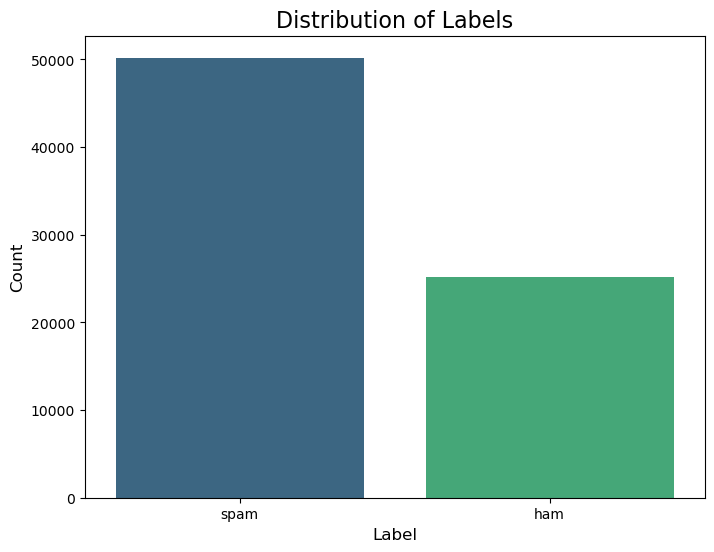

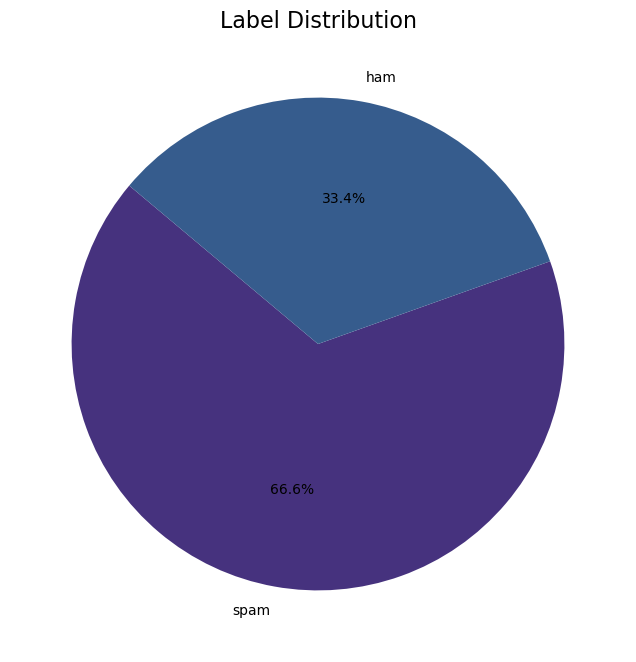

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=emails_df, palette='viridis')
plt.title('Distribution of Labels', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Pie chart for label distribution
plt.figure(figsize=(8, 8))
emails_df['Label'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Label Distribution', fontsize=16)
plt.ylabel('')  # Remove y-axis label for cleaner look
plt.show()


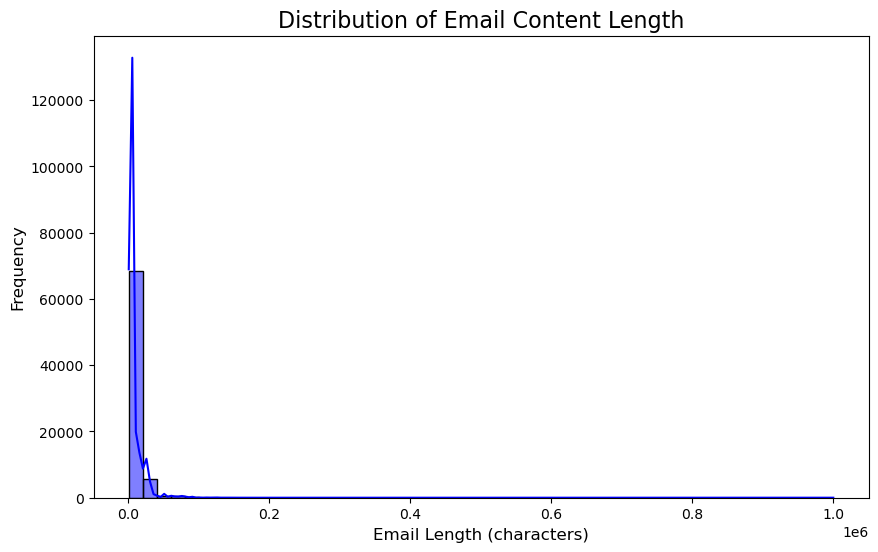

In [80]:


# Add a new column for email length
emails_df['Content_Length'] = emails_df['Content'].apply(len)

# Plot a histogram of email lengths
plt.figure(figsize=(10, 6))
sns.histplot(emails_df['Content_Length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Email Content Length', fontsize=16)
plt.xlabel('Email Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [81]:
df['Label'].value_counts()

Label
spam    50196
ham     25218
Name: count, dtype: int64

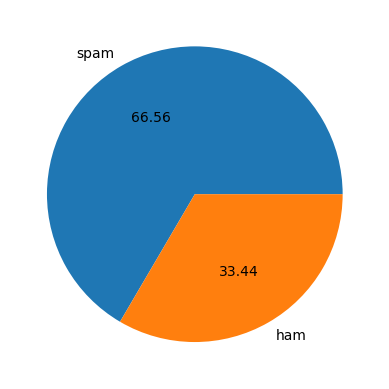

In [82]:
plt.pie(df['Label'].value_counts(), labels=['spam', 'ham'], autopct='%0.2f')
plt.show()

In [83]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekeuz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
#Total number of characters
df['Character_Count'] = df['Content'].apply(len)
df.head()

,Label,Filename,Content,Character_Count
0,spam,cmm541email.1,From RickyAmes@aol.com Sun Apr 8 13:07:32 20...,1761
1,ham,cmm541email.2,From bounce-debian-mirrors=ktwarwic=speedy.uwa...,3124
2,spam,cmm541email.3,From 7stocknews@tractionmarketing.com Sun Apr...,1776
3,spam,cmm541email.4,From vqucsmdfgvsg@ruraltek.com Sun Apr 8 13:...,1477
4,spam,cmm541email.5,From dcube@totalink.net Sun Apr 8 13:19:30 2...,19710


In [85]:
#Total number of words
df['Words_Count'] =  df['Content'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Label,Filename,Content,Character_Count,Words_Count
0,spam,cmm541email.1,From RickyAmes@aol.com Sun Apr 8 13:07:32 20...,1761,415
1,ham,cmm541email.2,From bounce-debian-mirrors=ktwarwic=speedy.uwa...,3124,466
2,spam,cmm541email.3,From 7stocknews@tractionmarketing.com Sun Apr...,1776,319
3,spam,cmm541email.4,From vqucsmdfgvsg@ruraltek.com Sun Apr 8 13:...,1477,290
4,spam,cmm541email.5,From dcube@totalink.net Sun Apr 8 13:19:30 2...,19710,1712


In [86]:
#Total number of sentences
df['Sentences_Count'] =  df['Content'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Label,Filename,Content,Character_Count,Words_Count,Sentences_Count
0,spam,cmm541email.1,From RickyAmes@aol.com Sun Apr 8 13:07:32 20...,1761,415,3
1,ham,cmm541email.2,From bounce-debian-mirrors=ktwarwic=speedy.uwa...,3124,466,8
2,spam,cmm541email.3,From 7stocknews@tractionmarketing.com Sun Apr...,1776,319,3
3,spam,cmm541email.4,From vqucsmdfgvsg@ruraltek.com Sun Apr 8 13:...,1477,290,3
4,spam,cmm541email.5,From dcube@totalink.net Sun Apr 8 13:19:30 2...,19710,1712,58


In [87]:
df[['Character_Count', 'Words_Count', 'Sentences_Count']].describe()

,Character_Count,Words_Count,Sentences_Count
count,75414.000000,75414.000000,75414.000000
mean,7602.199194,1053.741878,13.219243
std,12322.267518,1604.031307,19.001278
min,407.000000,71.000000,1.000000
25%,2786.000000,491.000000,5.000000
50%,3899.500000,694.000000,9.000000
75%,7025.000000,1106.000000,14.000000
max,1000000.000000,119079.000000,817.000000


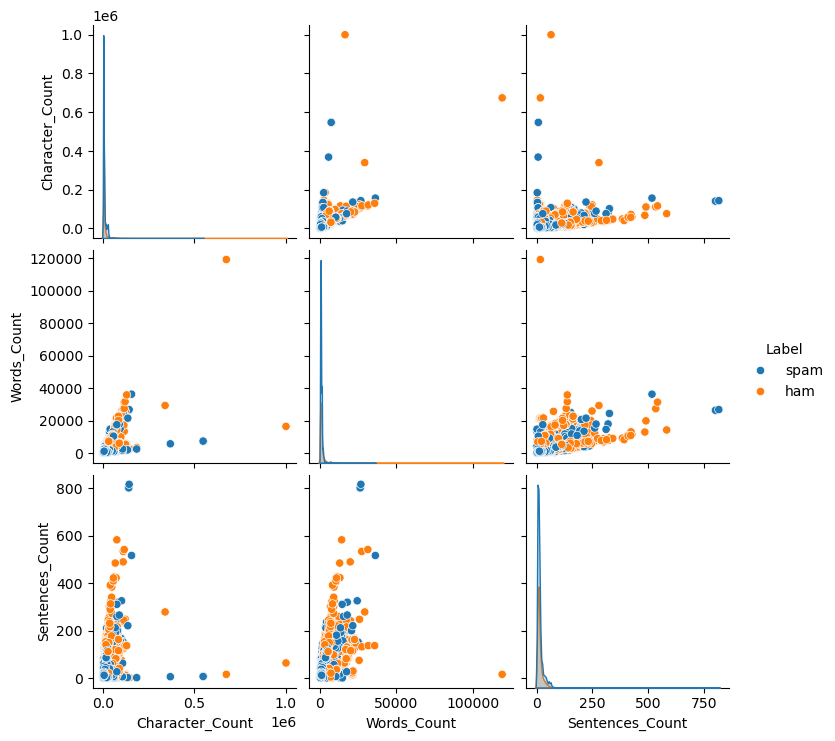

In [34]:
sns.pairplot(df, hue='Label')

In [88]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk

# Make sure you download the stopwords and punkt tokenizer if not already done
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def trans_content(Text):
    Text = Text.lower()  # Corrected from 'Content' to 'Text'
    Text = nltk.word_tokenize(Text)  # Tokenize Text, not 'Content'

    y = []
    for i in Text:  # Iterate over the tokenized Text
        if i.isalnum():  # Check if alphanumeric
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
        if i not in stop_words and i not in string.punctuation:  # Removing stopwords and punctuation
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
        y.append(ps.stem(i))  # Perform stemming

    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekeuz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekeuz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
df['Transformed_Content'] = df['Content'].apply(trans_content)
df.head()

,Label,Filename,Content,Character_Count,Words_Count,Sentences_Count,Transformed_Content
0,spam,cmm541email.1,From RickyAmes@aol.com Sun Apr 8 13:07:32 20...,1761,415,3,rickyam sun apr 8 2007 rickyam receiv smtp id ...
1,ham,cmm541email.2,From bounce-debian-mirrors=ktwarwic=speedy.uwa...,3124,466,8,sun apr 8 2007 receiv esmtp id l38h9s0i003031 ...
2,spam,cmm541email.3,From 7stocknews@tractionmarketing.com Sun Apr...,1776,319,3,7stocknew sun apr 8 2007 7stocknew receiv esmt...
3,spam,cmm541email.4,From vqucsmdfgvsg@ruraltek.com Sun Apr 8 13:...,1477,290,3,vqucsmdfgvsg sun apr 8 2007 vqucsmdfgvsg recei...
4,spam,cmm541email.5,From dcube@totalink.net Sun Apr 8 13:19:30 2...,19710,1712,58,dcube sun apr 8 2007 dcube receiv smtp id l38h...


In [91]:
data = df.where((pd.notnull(df)), '')

In [92]:
data.head()

,Label,Filename,Content,Character_Count,Words_Count,Sentences_Count,Transformed_Content
0,spam,cmm541email.1,From RickyAmes@aol.com Sun Apr 8 13:07:32 20...,1761,415,3,rickyam sun apr 8 2007 rickyam receiv smtp id ...
1,ham,cmm541email.2,From bounce-debian-mirrors=ktwarwic=speedy.uwa...,3124,466,8,sun apr 8 2007 receiv esmtp id l38h9s0i003031 ...
2,spam,cmm541email.3,From 7stocknews@tractionmarketing.com Sun Apr...,1776,319,3,7stocknew sun apr 8 2007 7stocknew receiv esmt...
3,spam,cmm541email.4,From vqucsmdfgvsg@ruraltek.com Sun Apr 8 13:...,1477,290,3,vqucsmdfgvsg sun apr 8 2007 vqucsmdfgvsg recei...
4,spam,cmm541email.5,From dcube@totalink.net Sun Apr 8 13:19:30 2...,19710,1712,58,dcube sun apr 8 2007 dcube receiv smtp id l38h...


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75414 entries, 0 to 75413
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Label                75414 non-null  object
 1   Filename             75414 non-null  object
 2   Content              75414 non-null  object
 3   Character_Count      75414 non-null  int64 
 4   Words_Count          75414 non-null  int64 
 5   Sentences_Count      75414 non-null  int64 
 6   Transformed_Content  75414 non-null  object
dtypes: int64(3), object(4)
memory usage: 4.0+ MB


In [94]:
data.shape

(75414, 7)

In [95]:
#To categorise the data to Spam and Ham
data.loc[data['Label'] == 'spam', 'Label',] = 0
data.loc[data['Label'] == 'ham', 'Label',] = 1

In [96]:
X = data['Content']

Y = data['Label']

In [97]:
print(X)

0        From RickyAmes@aol.com  Sun Apr  8 13:07:32 20...
1        From bounce-debian-mirrors=ktwarwic=speedy.uwa...
2        From 7stocknews@tractionmarketing.com  Sun Apr...
3        From vqucsmdfgvsg@ruraltek.com  Sun Apr  8 13:...
4        From dcube@totalink.net  Sun Apr  8 13:19:30 2...
                               ...                        
75409    From earnestnessaz35@phentermine.com  Fri Jul ...
75410    From mhln-admin@mailman.eppg.com  Fri Jul  6 0...
75411    From Gerry.Rossi4360@kinki-kids.com  Fri Jul  ...
75412    From hearst@cdrcorp.com  Fri Jul  6 06:55:55 2...
75413    From Merrill8783@168city.com  Fri Jul  6 07:00...
Name: Content, Length: 75414, dtype: object


In [98]:
print(Y)

0        0
1        1
2        0
3        0
4        0
        ..
75409    0
75410    0
75411    0
75412    0
75413    0
Name: Label, Length: 75414, dtype: object


In [99]:
#Spliting the data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 3)

In [100]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(75414,)
(60331,)
(15083,)


In [101]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(75414,)
(60331,)
(15083,)


In [102]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Ensure these variables are correctly named
X_train_features = feature_extraction.fit_transform(X_train)  # Corrected from X_tarin
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')  # Corrected from Y_tarin
Y_test = Y_test.astype('int')

In [103]:
print(X_train)

70756    From inbox@messaging.accuweather.com  Sun Jul ...
68702    From mklucblqfucnlt@bellauk.com  Thu Jun 28 13...
55312    From undwpsfgw@look.ca  Mon Jun 11 06:33:45 20...
17907    From perl6-all-return-80812-ktwarwic=speedy.uw...
75076    From dwgtsccm@gtscc.com  Thu Jul  5 19:08:51 2...
                               ...                        
25365    From a-ralls@swbell.net  Mon Apr 30 11:00:10 2...
48056    From alandsbergisonb@elshr.com  Thu May 31 18:...
59011    From speakup-bounces@braille.uwo.ca  Sat Jun 1...
67224    From dwpenom@peno.com  Wed Jun 27 08:50:08 200...
71530    From jamescng@yahoo.com  Mon Jul  2 01:42:46 2...
Name: Content, Length: 60331, dtype: object


In [70]:
print(X_train_features)

  (0, 1316928)	0.011617758752996216
  (0, 875318)	0.013286234126889672
  (0, 1163388)	0.011617758752996216
  (0, 2562286)	0.022466714421996825
  (0, 2572769)	0.008621570199542017
  (0, 2301696)	0.015410204895402535
  (0, 2622026)	0.008021191049096654
  (0, 2622030)	0.013286234126889672
  (0, 2438814)	0.007749898071336909
  (0, 2449192)	0.007448369170534663
  (0, 1033651)	0.006868277583620086
  (0, 150480)	0.013274950803220057
  (0, 2242124)	0.009615146598916416
  (0, 1028053)	0.01024095323488112
  (0, 2464119)	0.008658488671185887
  (0, 2245922)	0.010693388105151216
  (0, 2516987)	0.009601614484143444
  (0, 302657)	0.012490341546418754
  (0, 2909032)	0.007892954691882248
  (0, 2579549)	0.01010728983266762
  (0, 1297716)	0.009520733507178867
  (0, 2875047)	0.009290838526364226
  (0, 2389174)	0.007774657066342401
  (0, 2873698)	0.026572468253779343
  (0, 1972728)	0.004188248126776379
  :	:
  (60331, 833518)	0.011797399235321566
  (60331, 1002455)	0.009526100569375846
  (60331, 1511333)	0

In [146]:
model = LogisticRegression()

In [169]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [170]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [149]:
print('Acc on training data : ', accuracy_on_training_data)

Acc on training data :  0.9969501582934147


In [150]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [151]:
print('Acc on test data : ', accuracy_on_test_data)

Acc on test data :  0.9973480076907777


In [152]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Training data
training_data = ["Example text for training", "Another training example"]
labels = [1, 0]  # Corresponding labels: 1 = Ham, 0 = Spam

# Initialize and fit vectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(training_data)

# Train the model
model = LogisticRegression()
model.fit(X_train, labels)

# Save vectorizer and model
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


In [173]:
# Load the saved vectorizer and model
with open("vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)
with open("model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# New input
input_your_mail = ["Hey Bob, mind if we go for a game tonight"]

# Transform input using the loaded vectorizer
input_data_features = vectorizer.transform(input_your_mail)

# Predict using the loaded model
prediction = model.predict(input_data_features)

# Output prediction
print(prediction)
if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')


[1]
Ham mail


In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn. feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [175]:
data = pd.read_csv(r"C:\Users\ekeuz\Desktop\Accessment Prep\Machine Learning\Dataset for the coursework\cmm541data\emails\emails_data.csv")

In [176]:
data.drop_duplicates(inplace=True)
data['Label'] = data['Label'].replace(['ham','spam'], ['Not spam','Spam'])

In [177]:
cont = data['Content']
lab = data['Label']

In [157]:
(cont_train, cont_test, lab_train, lab_test) = train_test_split(cont, lab, test_size=0.2)

In [166]:
cv =CountVectorizer(stop_words='english')
features = cv.fit_transform(cont_train)

In [178]:
model = MultinomialNB()
model.fit(features, lab_train)

MultinomialNB()

In [ ]:
#Test our model
features_test = cv.transform(cont_test)
print(model.score(features_test, lab_test))

In [ ]:
#predict Data


In [ ]:
def predict(Content):
    content = cv.transform([Content]).toarray()
    result = model.predict(content)
    return result
output = predict('Click on this link below to win huge price of money')
print(output)